
# **Connect to google drive and load data**
---



In [1]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [34]:
#2.1 Get the file
downloaded = drive.CreateFile({'id':'1obE87a8bwW20TPc0hrhe2XYjFrVfSqAO'}) # replace the id with id of file you want to access
downloaded.GetContentFile('datax.csv') 

# **Import Libraries**

---



In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.stats import chi2_contingency


# **Data Cleaning**

---


In [36]:
#remove chained_assignment errors
pd.options.mode.chained_assignment = None
df= pd.read_csv('datax.csv')

**Drop unwanted columns**

In [37]:
#Drop unwanted columns
df.drop(['article_article','article_Style','article_karat'],inplace=True, axis=1)

**Create types**

In [38]:
#Create types
df['Type']='Type'
for i in range(0,780,1):
  if 'Earrings' in df['article_name'][i]:
     df.xs(i)['Type']= 'Earrings'
  elif 'Hoops' in df['article_name'][i]:
     df.xs(i)['Type']= 'Earrings'
  elif 'Ring' in df['article_name'][i]:
     df.xs(i)['Type']= 'Ring'
  elif 'Necklace' in df['article_name'][i] :
     df.xs(i)['Type']= 'Necklace'
  elif 'Chain' in df['article_name'][i] :
     df.xs(i)['Type']= 'Necklace'
  elif 'Pendant' in df['article_name'][i]:
     df.xs(i)['Type']= 'Pendant'
  elif 'Bracelet' in df['article_name'][i]:
     df.xs(i)['Type']= 'Bracelet'
  else: df.xs(i)['Type']= None

#Rearrange the columns 
df = df[['article_name', 'Type', 'article_Material', 'article_Material_color',
       'article_primary_stone', 'article_weight', 'article_price']]


**Fixing missing values in weight feature by applying mean method**

In [39]:
#Fixing missing values in weight feature by applying mean method
for i in range(0,780,1):
  if 'grams' in df['article_weight'][i]:
     df.xs(i)['article_weight'] = df['article_weight'][i].replace("grams", "")
     
  else: 
     df.xs(i)['article_weight'] = None
df['article_weight']=df['article_weight'].astype(float)
df['article_weight'].fillna((df['article_weight'].mean()), inplace=True)



In [17]:
print(df['article_weight'])

0      15.540000
1      53.200000
2       5.053651
3       5.053651
4      51.540000
         ...    
775     5.053651
776     5.053651
777     5.053651
778     5.053651
779     5.053651
Name: article_weight, Length: 780, dtype: float64


**Fixing missing values in price by applying mean method**

In [40]:
#Fixing missing values in price by applying mean method
for i in range(0,780,1):
  #remove $ sign
  if '$' in df['article_price'][i]:
      df.loc[i, 'article_price']= df['article_price'][i][1:]
      #remove , in order to turn values into float
      if ',' in  df['article_price'][i]:
        df.loc[i, 'article_price']= df['article_price'][i].replace(',','')
      
  else:
      df.xs(i)['article_price'] = None

df['article_price']=df['article_price'].astype(float)
df['article_price'].fillna((df['article_price'].mean()), inplace=True)


In [ ]:
print(df.head(100))

In [41]:
df.columns

Index(['article_name', 'Type', 'article_Material', 'article_Material_color',
       'article_primary_stone', 'article_weight', 'article_price'],
      dtype='object')

In [47]:
x=df.article_weight


**Remove null values not fixed**

In [ ]:
df = df.dropna(how='any',axis=0) 
print(df)

                                 article_name  ... article_price
0                    30 mm Wide Hoop Earrings  ...          30.0
1                          Oval Link Necklace  ...          30.0
2                             Cigar Band Ring  ...          35.0
3                          Polished Link Ring  ...          35.0
4        Garibaldi Double Link Chain Necklace  ...          30.0
..                                        ...  ...           ...
775               Pearl Pendant with Diamonds  ...          35.0
776  1/2 ct White Sapphire Open Heart Pendant  ...          35.0
777                1/4 ct Diamond Bypass Ring  ...          98.0
778                3 ct Peridot Stud Earrings  ...          77.0
779                      11 mm Pearl Bracelet  ...          42.0

[746 rows x 7 columns]


# **Visualizations**



---



**Boxplots**




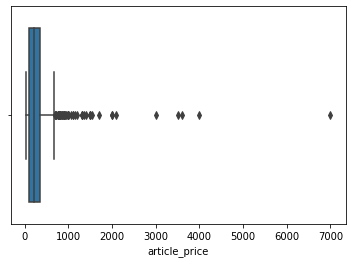

In [ ]:
#Visualizing outliers using boxplot
sns.boxplot(x=df['article_price'])
 

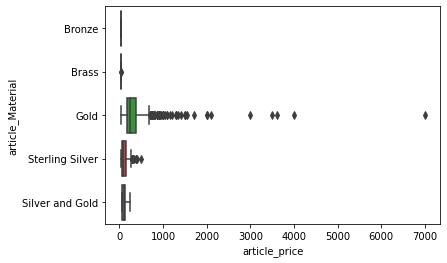

In [ ]:
#Visualizing outliers using boxplot
#Material effect
sns.boxplot(y=df['article_Material'],x=df['article_price'])

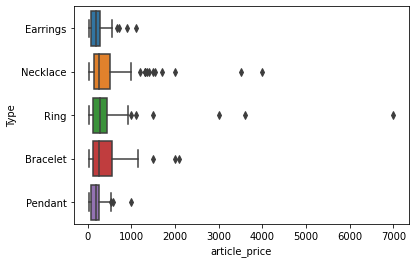

In [ ]:
#Visualizing outliers using boxplot
#Type effect
sns.boxplot(y=df['Type'],x=df['article_price'])

In [ ]:
#Material effect
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df['article_Material'], df['article_price'],color='red')
ax.set_xlabel('Article Material')
ax.set_ylabel('Price per $')
plt.show()


In [ ]:
#Material_color effect
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df['article_Material_color'], df['article_price'],color='green')
ax.set_xlabel('Article Material Color')
ax.set_ylabel('Price per $')
plt.show()

In [ ]:
#Type effect
fig, ax = plt.subplots(figsize=(17,8))
ax.scatter(df['Type'], df['article_price'],color='lightblue')
ax.set_xlabel('Article Material')
ax.set_ylabel('Price per $')
plt.show()

**Z-score analysis and remove outliers**





In [ ]:
#Z-score analysis to show outliers
mean = np.mean(df['article_price']) 
std = np.std(df['article_price']) 

print('Mean of prices :', mean) 
print('STD Deviation of prices :', std)

threshold = 3
outlier = [] 
#Find outliers
for i in df['article_price']: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('Outliers:', outlier)  # show outliers

#Remove outliers to not disturb results
upper = df.article_price.mean() + 3*df.article_price.std()
lower = df.article_price.mean() -3*df.article_price.std()
print('upper = ' , upper)
print('lower =' , lower)
new_df= df[(df.article_price<upper) & (df.article_price>lower)]
new_df

new_df.to_csv('Data_without_outliers.csv')




Mean of prices : 300.2131367292225
STD Deviation of prices : 438.13774370028
Outliers: [2000.0, 3500.0, 3600.0, 1700.0, 4000.0, 7000.0, 2000.0, 2100.0, 3000.0]
upper =  1615.5082285338297
lower = -1015.0819550753847


**Create Price Ranges**

In [ ]:
#price ranges
df2=pd.read_csv('Data_without_outliers.csv')
df2['price_range']='range'

df2
for i in range(0,737,1):
    if int(df2['article_price'][i]) in range(0,75):
     df2.loc[i, 'price_range']= 'Range1'
    elif int(df2['article_price'][i]) in range(75,200):
     df2.loc[i, 'price_range']= 'Range2'
    elif int(df2['article_price'][i]) in range(200,700):
     df2.loc[i, 'price_range']= 'Range3'
    elif int(df2['article_price'][i]) in range(700,1000):
     df2.loc[i, 'price_range']= 'Range4'
    elif int(df2['article_price'][i]) in range(1000,5000):
      df2.loc[i, 'price_range']= 'Range5'
df2


In [ ]:
#Rearrange 
df2= df2[['Type', 'article_Material', 'article_Material_color',
       'article_primary_stone', 'article_weight', 'price_range']]
df2.to_csv('ready.csv')


# **Feature Selection**



> **Univariate analysis**


> Chi2 test to know which features are significant




In [ ]:
dff=df2
#Getting all the categorical columns except the target
categorical_columns = dff.select_dtypes(exclude = 'number').drop('price_range', axis = 1).columns
dff.info()

chi2_check = []

for i in categorical_columns:
    if chi2_contingency(pd.crosstab(dff['price_range'], dff[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Type                    737 non-null    object 
 1   article_Material        737 non-null    object 
 2   article_Material_color  737 non-null    object 
 3   article_primary_stone   737 non-null    object 
 4   article_weight          737 non-null    float64
 5   price_range             737 non-null    object 
dtypes: float64(1), object(5)
memory usage: 34.7+ KB
                   Column              Hypothesis
0                    Type  Reject Null Hypothesis
1        article_Material  Reject Null Hypothesis
2  article_Material_color  Reject Null Hypothesis
3   article_primary_stone  Reject Null Hypothesis




> ***All features are informative*** 








*Correlation between features*

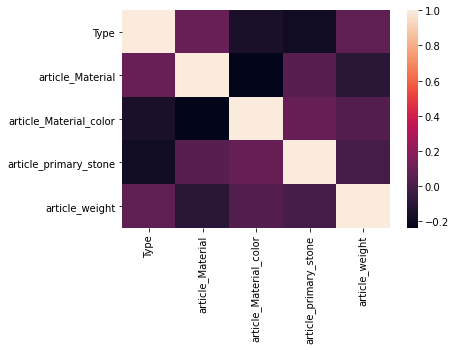

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

data = pd.read_csv('ready.csv')

data = data.iloc[:,1:-1]
label_encoder = LabelEncoder()

data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')
data.iloc[:,1] = label_encoder.fit_transform(data.iloc[:,1]).astype('float64')
data.iloc[:,2] = label_encoder.fit_transform(data.iloc[:,2]).astype('float64')
data.iloc[:,3] = label_encoder.fit_transform(data.iloc[:,3]).astype('float64')



corr = data.corr()
sns.heatmap(corr)


No correlation between features appear to exceed 0.2. 

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]
data

,Type,article_Material,article_Material_color,article_primary_stone,article_weight
0,1.0,1.0,5.0,14.0,15.540000
1,2.0,1.0,5.0,14.0,53.200000
2,4.0,1.0,5.0,14.0,5.053651
3,4.0,1.0,5.0,14.0,5.053651
4,2.0,1.0,5.0,14.0,51.540000
...,...,...,...,...,...
732,3.0,4.0,4.0,17.0,5.053651
733,3.0,4.0,1.0,23.0,5.053651
734,4.0,4.0,4.0,7.0,5.053651
735,1.0,3.0,3.0,18.0,5.053651


**#Backward Elimination**

> In backward elimination, we start with the full model (including all the independent variables) and then remove the insignificant feature with the highest p-value(> significance level). This process repeats again and again until we have the final set of significant features.



> 


1.   Choose a significance level (e.g. SL = 0.05 with a 95% confidence).
2.   Fit a full model including all the features.
3. Consider the feature with the highest p-value. If the p-value > significance level then go to Step 4, otherwise terminate the process.
4. Remove the feature which is under consideration.
5. Fit a model without this feature. Repeat the entire process from Step 3.








In [ ]:

import statsmodels.regression.linear_model as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(endog=Y, exog=x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)


In [ ]:
selected_columns

Index(['Type', 'article_Material', 'article_primary_stone', 'article_weight'], dtype='object')

This method has eliminated the article_material_color